# Oscillateur amorti

Import des librairies

In [1]:
import matplotlib.pyplot as plt
IPython_default = plt.rcParams.copy()

In [2]:
import numpy as np
from scipy.integrate import odeint
from ipywidgets import interact,interactive, fixed

## Fonction oscillateur
Définition de la fonction oscillateur. Deux paramètres sont importants: 
- om: pour $\omega_0$
- Q: facteur de qualité

In [3]:
def oscillateur(y,t, om, Q):
    return (y[1], -om**2*y[0] - om/Q*y[1])

## Paramètres de la simulation
On définit le temps et trois oscillateurs afin d'illustrer les différents régimes. Les conditions initiales sont $y=1$ et $\dot{y}=0$. $\omega_0$ est fixé à 1.

In [4]:
t = np.arange(0.,50,.1)
Ypp = odeint(oscillateur, (1, 0), t, args=(1, 3)) # omega = 1, Q=3
Yc = odeint(oscillateur, (1, 0), t, args=(1, 0.5)) # omega = 1, Q=0.5
Yap = odeint(oscillateur, (1, 0), t, args=(1, 0.1)) # omega = 1, Q=0.1

## Première figure: visualisation des différents régimes

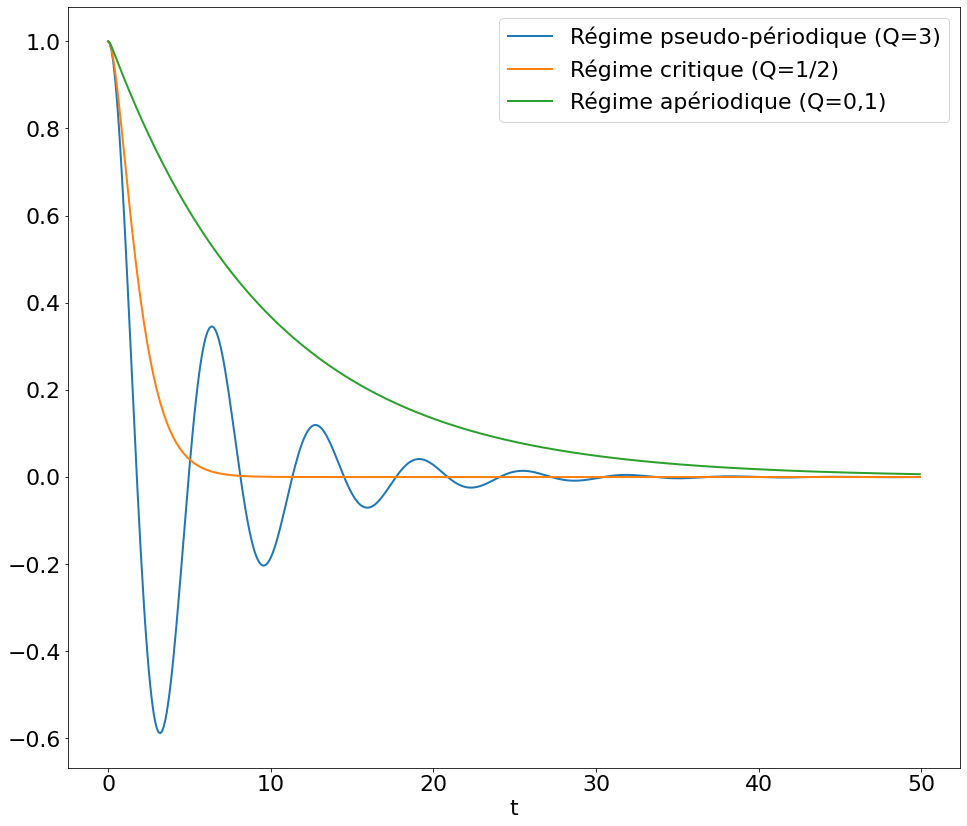

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 14) # (w, h)
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1)
ax.plot(t, Ypp[:,0], lw=2, label="Régime pseudo-périodique (Q=3)")
ax.plot(t, Yc[:,0], lw=2, label="Régime critique (Q=1/2)")
ax.plot(t, Yap[:,0], lw=2, label="Régime apériodique (Q=0,1)")
ax.set_xlabel("t")
ax.legend()
plt.show()

## Deuxième figure: modification de $Q$ et de $\omega_0$

In [6]:
def plot(Q,om,t_max,grid=True):
    plt.rcParams["figure.figsize"] = (16, 14) # (w, h)
    plt.rcParams.update({'font.size': 22})
    t = np.arange(0.,t_max,.1)
    Y=odeint(oscillateur, (1, 0), t, args=(om, Q))
    fig, ax = plt.subplots(1, 1)
    ax.plot(t, Y[:,0] , lw=2, color="blue")
    ax.grid(grid)
    ax.set_ylim (-1.05,1.05)
    ax.set(xlabel="Temps (s)", ylabel="q ou x")
    plt.show()

In [7]:
%matplotlib inline
interactive_plot=interactive(plot, Q=(0.01,7.01,0.01), om=(0,3,0.1),t_max=(30,100,10))

In [8]:
interactive_plot

Widget Javascript not detected.  It may not be installed or enabled properly.
